In [165]:
import matplotlib.pyplot as plt
plt.style.use('classic')
import numpy as np
import pandas as pd

In [166]:
#create some data
rng=np.random.RandomState(0)
x=np.linspace(0,10,500)
y=np.cumsum(rng.randn(500,6),0)

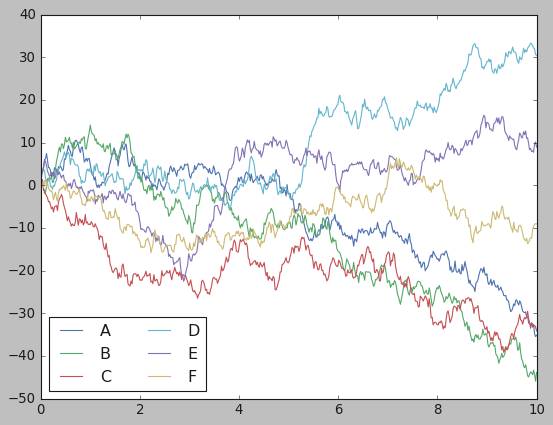

In [167]:
#plot data with matplotlib defaults
plt.plot(x,y)
plt.legend('ABCDEF', ncol=2, loc='lower left');

In [168]:
import seaborn as sns
sns.set()

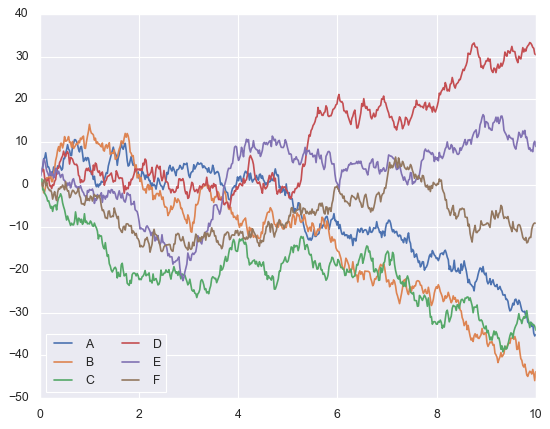

In [169]:
plt.plot(x,y)
plt.legend('ABCDEF', ncol=2, loc='lower left');

### Exploring Seaborn Plots:
Histograms,KDE, and densities

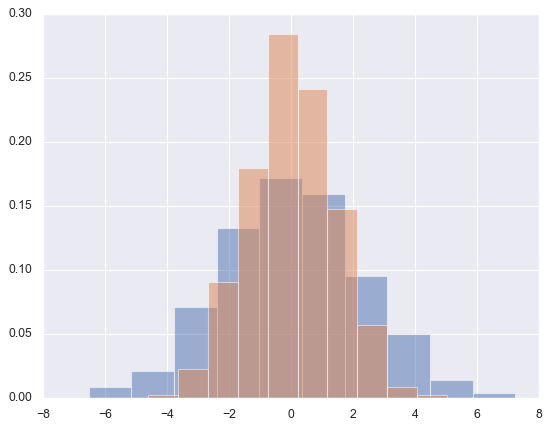

In [170]:
data=np.random.multivariate_normal([0,0],[[5,2],[2,2]], size=2000)
data=pd.DataFrame(data, columns=['x','y'])

for col in 'xy':
    plt.hist(data[col], density=True, alpha=0.5)

#### Kernel Density Estimation¶

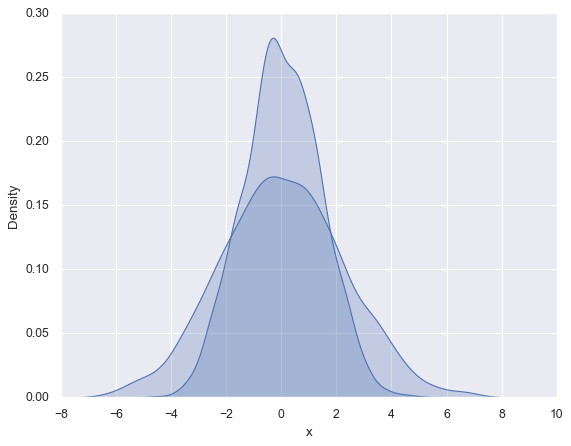

In [171]:
for col in 'xy':
    sns.kdeplot(data[col], shade=True)

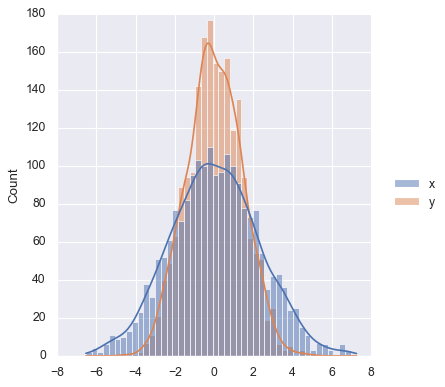

In [172]:
sns.displot(data, kde=True);
#sns.displot(data['y']);

Text(0.5, 1.0, '2D Kernel density plot')

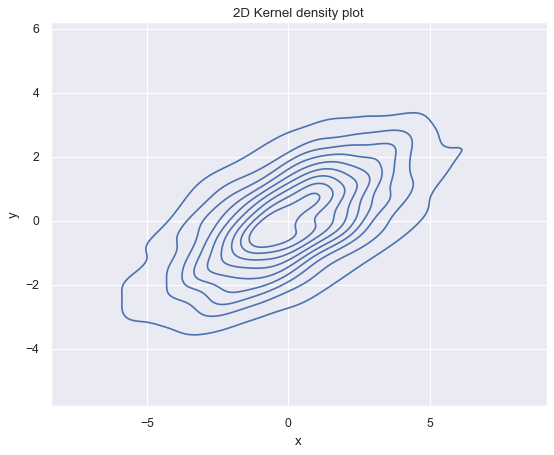

In [173]:
sns.kdeplot(data['x'], y=data['y']);
plt.title("2D Kernel density plot");

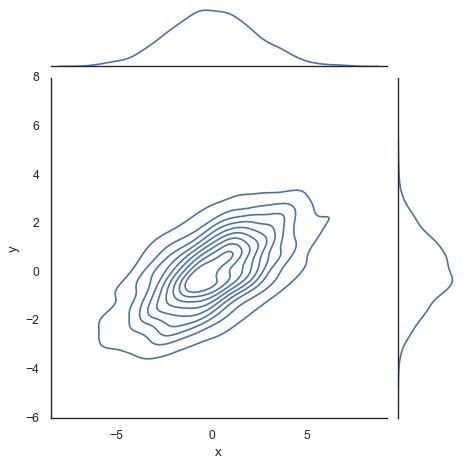

In [174]:
with sns.axes_style('white'):
    sns.jointplot(x="x",y="y",data=data, kind='kde');

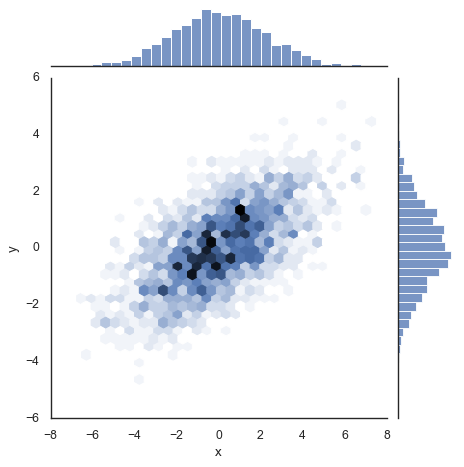

In [175]:
with sns.axes_style('white'):
    sns.jointplot(x="x",y="y",data=data, kind="hex")

#### Pair plots

In [176]:
iris=sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


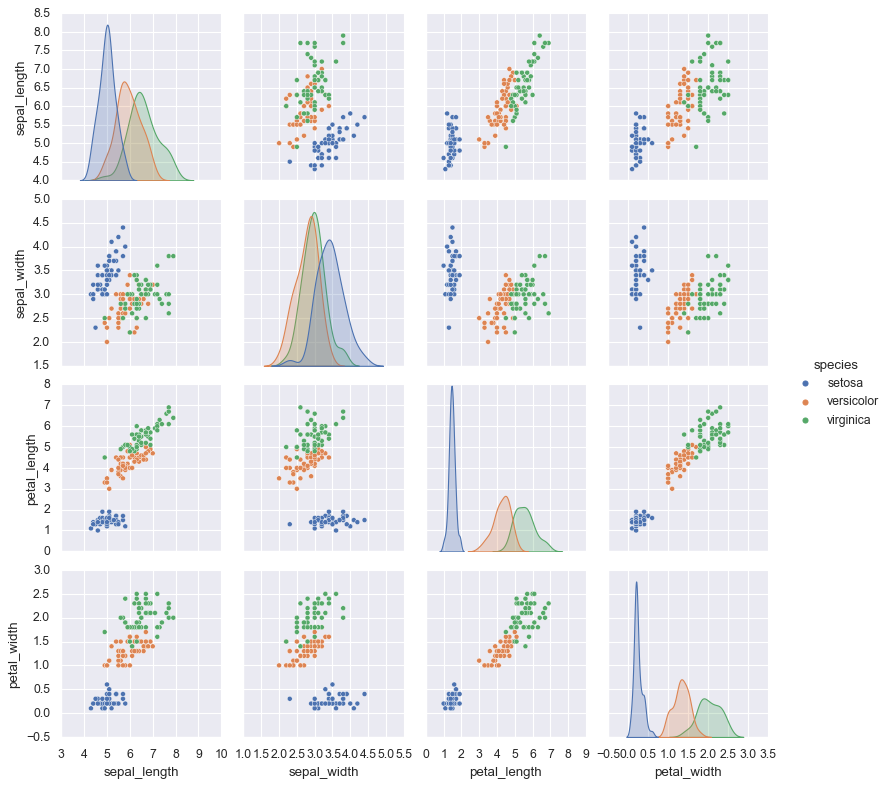

In [177]:
sns.pairplot(iris, hue='species',height=2.5);

#### Faceted histograms

In [178]:
tips=sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


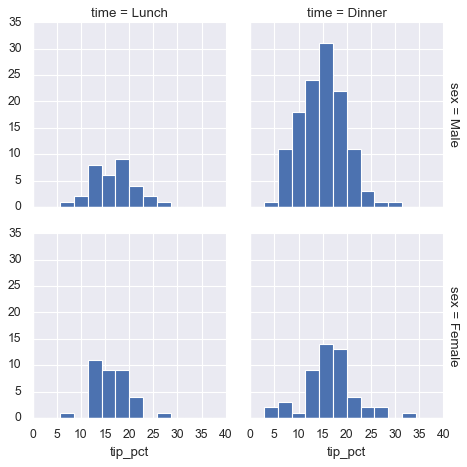

In [180]:
tips['tip_pct']=100*tips['tip']/tips['total_bill']
grid=sns.FacetGrid(tips, row='sex', col='time', margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0,40,15));

#### Factor plots

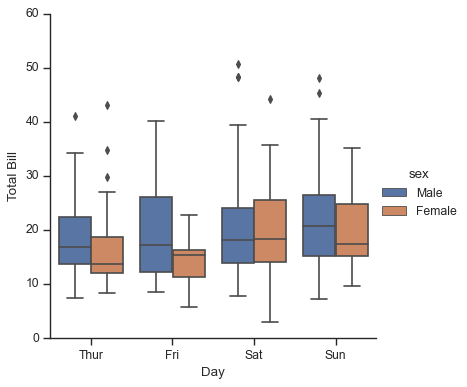

In [184]:
with sns.axes_style(style='ticks'):
    g=sns.catplot(x="day",y="total_bill",hue= "sex", data=tips, kind="box")
    g.set_axis_labels("Day","Total Bill");

#### Joint distributions

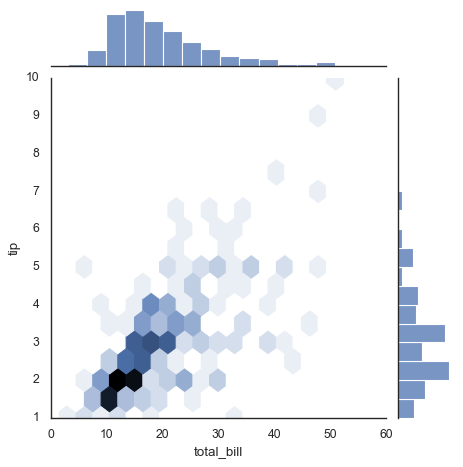

In [186]:
with sns.axes_style('white'):
    sns.jointplot(x="total_bill", y='tip',data=tips,kind='hex')

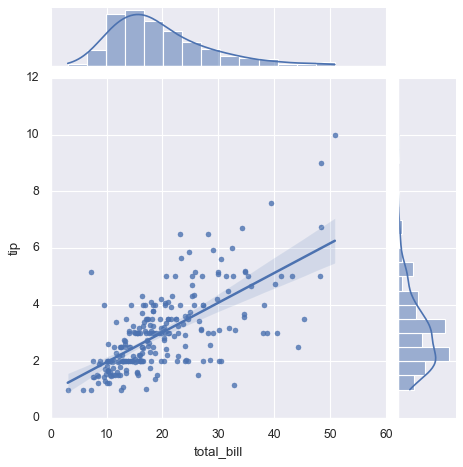

In [187]:
sns.jointplot(x="total_bill",y= "tip",data=tips, kind='reg');

#### Bar plots

In [188]:
planets=sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


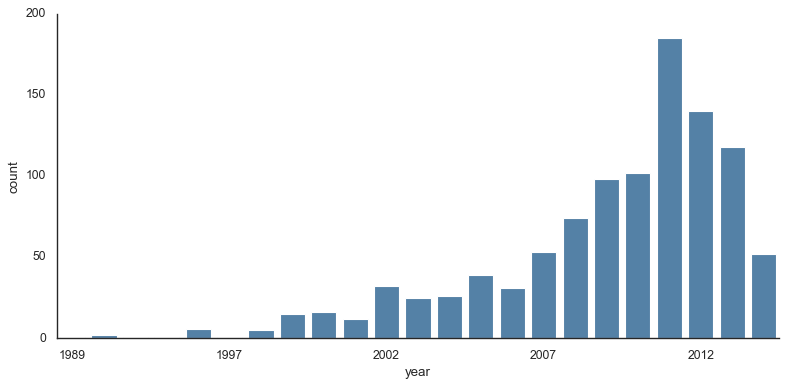

In [189]:
with sns.axes_style('white'):
    g=sns.catplot(x="year",data=planets,aspect=2,
                    kind="count",color='steelblue')
    g.set_xticklabels(step=5)

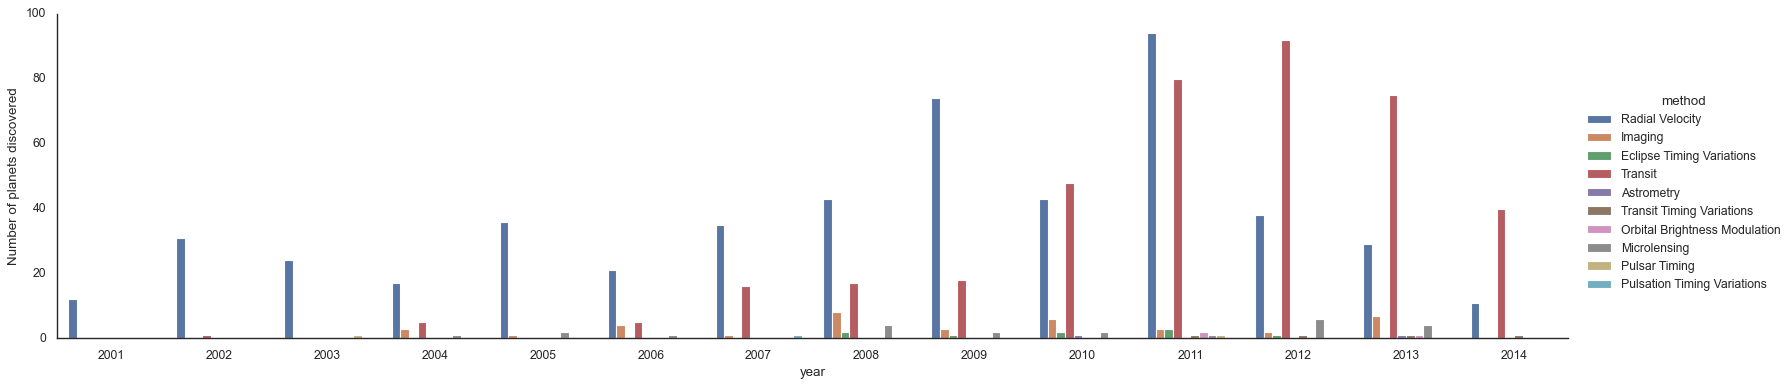

In [190]:
with sns.axes_style('white'):
    g=sns.catplot(x="year", data=planets, aspect=4.0, kind='count',
                 hue='method', order=range(2001,2015))
    g.set_ylabels("Number of planets discovered");

#### Example: Exploring Marathon Finishing Times


In [191]:
data=pd.read_csv("marathon-data.csv")
data.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


In [192]:
data.dtypes

age        int64
gender    object
split     object
final     object
dtype: object

In [193]:
import datetime
def convert_time(s):
    h,m,s=map(int,s.split(':'))
    return datetime.timedelta(hours=h,minutes=m,seconds=s)

data=pd.read_csv('marathon-data.csv',
                converters={'split':convert_time, 'final':convert_time})
data.head()

,age,gender,split,final
0,33,M,0 days 01:05:38,0 days 02:08:51
1,32,M,0 days 01:06:26,0 days 02:09:28
2,31,M,0 days 01:06:49,0 days 02:10:42
3,38,M,0 days 01:06:16,0 days 02:13:45
4,31,M,0 days 01:06:32,0 days 02:13:59


In [194]:
data.dtypes

age                 int64
gender             object
split     timedelta64[ns]
final     timedelta64[ns]
dtype: object

In [195]:
data['split_sec']=data['split'].astype(np.int64)/1E9
data['final_sec']=data['final'].astype(np.int64)/1E9
data.head()

,age,gender,split,final,split_sec,final_sec
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0


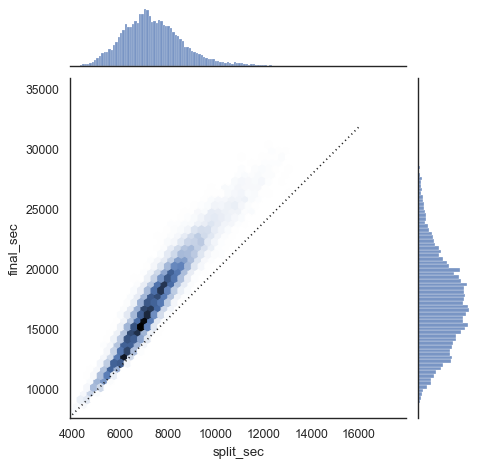

In [196]:
with sns.axes_style('white'):
    g=sns.jointplot(x="split_sec",y="final_sec",data=data,kind='hex' )
    g.ax_joint.plot(np.linspace(4000,16000),
                   np.linspace(8000,32000),':k')

In [197]:
data['split_frac']=1-2*data['split_sec']/data['final_sec']
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0,-0.018756
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0,-0.026262
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0,-0.022443
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0,0.009097
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0,0.006842


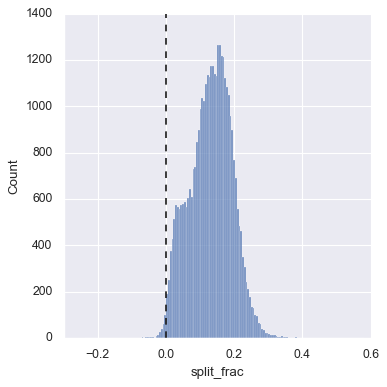

In [198]:
sns.displot(data['split_frac'],kde=False);
plt.axvline(0, color='k', linestyle="dashed");

In [199]:
sum(data.split_frac<0)

251

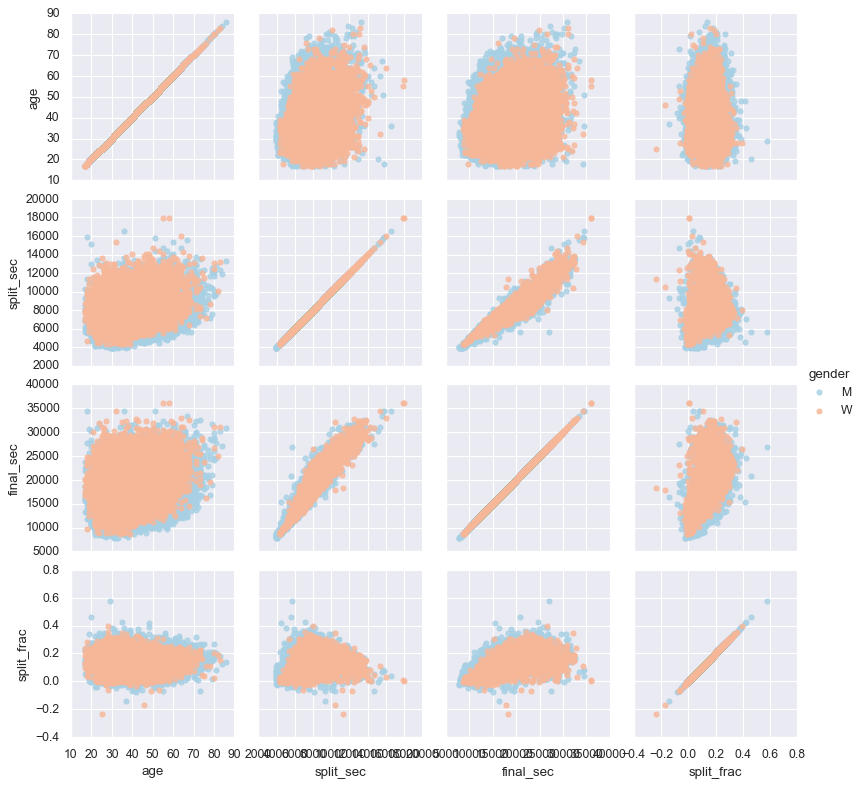

In [200]:
g=sns.PairGrid(data, vars=['age','split_sec','final_sec','split_frac'],
              hue='gender', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

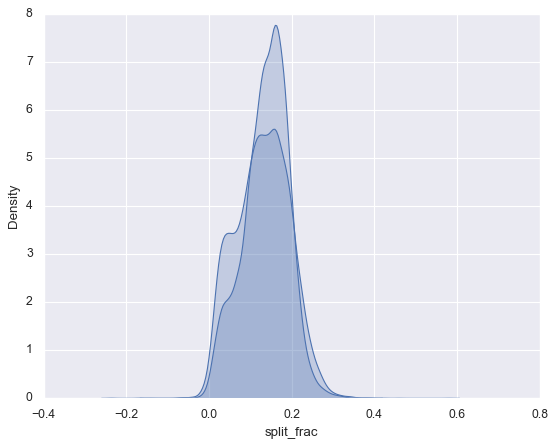

In [201]:
sns.kdeplot(data.split_frac[data.gender=='M'],label='Men', shade=True)
sns.kdeplot(data.split_frac[data.gender=='W'],label='Women', shade=True)
plt.xlabel('split_frac');

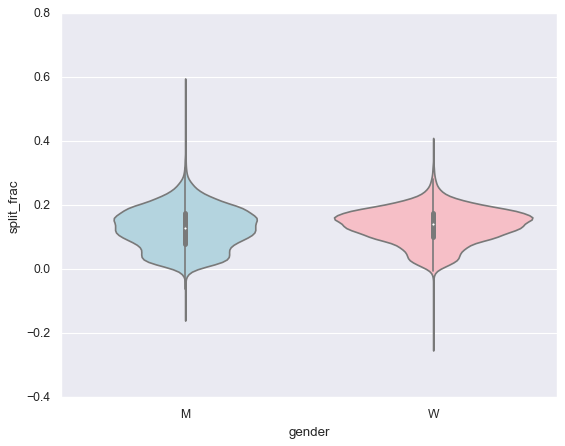

In [202]:
sns.violinplot(x="gender",y="split_frac", data=data,
              palette=['lightblue','lightpink']);

In [203]:
data['age_dec']=data.age.map(lambda age:10*(age//10))
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac,age_dec
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0,-0.018756,30
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0,-0.026262,30
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0,-0.022443,30
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0,0.009097,30
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0,0.006842,30


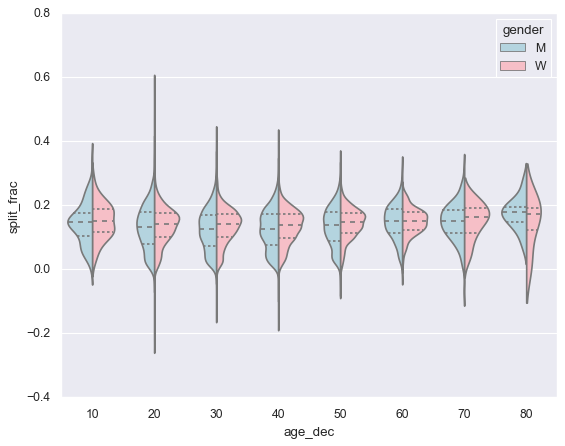

In [204]:
men=(data.gender=='M')
Women=(data.gender=='W')

with sns.axes_style(None):
    sns.violinplot(x='age_dec',y='split_frac', hue='gender',data=data,
                  split=True,inner='quartile',
                  palette=['lightblue', 'lightpink']);

In [205]:
(data.age>80).sum()

7

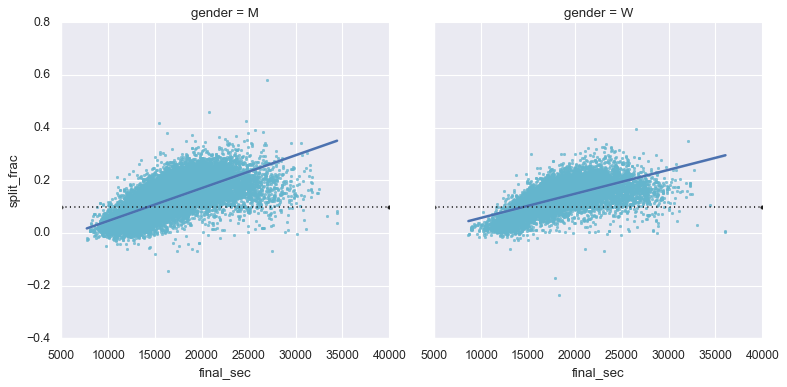

In [206]:
g=sns.lmplot(x='final_sec',y='split_frac',col='gender',data=data,
            markers=".", scatter_kws=dict(color='c'))
g.map(plt.axhline, y=0.1, color='k', ls=":");